In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,NaN,NaN,0.562096
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814399755560454,1010.9226539809573,C3,E00,NaN,0.573776
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,E00,fixed,0.341874


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   temperature         18999 non-null  float64
 2   irradiance          19013 non-null  float64
 3   humidity            20000 non-null  object 
 4   panel_age           18989 non-null  float64
 5   maintenance_count   18973 non-null  float64
 6   soiling_ratio       18990 non-null  float64
 7   voltage             19007 non-null  float64
 8   current             19023 non-null  float64
 9   module_temperature  19022 non-null  float64
 10  cloud_coverage      18990 non-null  float64
 11  wind_speed          20000 non-null  object 
 12  pressure            20000 non-null  object 
 13  string_id           20000 non-null  object 
 14  error_code          14088 non-null  object 
 15  installation_type   14972 non-null  object 
 16  effi

In [5]:
df.describe()

,id,temperature,irradiance,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,efficiency
count,20000.000000,18999.000000,19013.000000,18989.000000,18973.000000,18990.000000,19007.000000,19023.000000,19022.000000,18990.000000,20000.000000
mean,9999.500000,25.077241,501.273896,17.509758,4.012070,0.698879,16.242251,1.713396,29.923807,51.378575,0.510260
std,5773.647028,12.513129,250.926590,10.097557,2.002268,0.172244,17.889031,1.152953,12.125405,48.473664,0.140420
min,0.000000,0.000000,-597.278646,0.001264,0.000000,0.400149,0.000000,0.000054,0.000000,0.000244,0.000000
25%,4999.750000,16.853522,332.227277,8.777905,3.000000,0.550654,0.000000,0.772311,21.522124,25.081618,0.445613
50%,9999.500000,24.720345,499.654730,17.497731,4.000000,0.697663,12.350138,1.558413,29.857669,49.704133,0.515709
75%,14999.250000,32.848917,668.416734,26.340761,5.000000,0.847838,26.557322,2.474744,38.094943,75.052824,0.590324
max,19999.000000,147.394168,1537.810349,34.998379,15.000000,0.999949,494.279016,7.315597,65.000000,1000.000000,0.987066


In [6]:
df.isnull().sum()

id                       0
temperature           1001
irradiance             987
humidity                 0
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed               0
pressure                 0
string_id                0
error_code            5912
installation_type     5028
efficiency               0
dtype: int64

In [7]:
df.isna().sum()

id                       0
temperature           1001
irradiance             987
humidity                 0
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed               0
pressure                 0
string_id                0
error_code            5912
installation_type     5028
efficiency               0
dtype: int64

In [8]:
num_cols = [clm for clm in df.columns if df[clm].dtype != 'object']

In [9]:
num_cols

['id',
 'temperature',
 'irradiance',
 'panel_age',
 'maintenance_count',
 'soiling_ratio',
 'voltage',
 'current',
 'module_temperature',
 'cloud_coverage',
 'efficiency']

In [10]:
cat_cols = [clm for clm in df.columns if df[clm].dtype == 'object']

In [11]:
cat_cols

['humidity',
 'wind_speed',
 'pressure',
 'string_id',
 'error_code',
 'installation_type']

In [12]:
df['humidity'].unique()

array(['41.24308670850264', '1.3596482765960705', '91.26536837560256',
       ..., '37.9689180401391', '43.01470184078199', '28.91878053813607'],
      dtype=object)

In [13]:
df['humidity'].nunique()

19876

In [14]:
df['humidity'] = pd.to_numeric(df['humidity'], errors='coerce')

In [15]:
df['wind_speed'].nunique()

19884

In [16]:
df['pressure'].nunique()

19868

In [17]:
df['string_id'].nunique()

4

In [18]:
df['string_id'].unique()

array(['A1', 'D4', 'C3', 'B2'], dtype=object)

In [19]:
df['error_code'].nunique()

3

In [20]:
df['error_code'].unique()

array([nan, 'E00', 'E01', 'E02'], dtype=object)

In [21]:
df['installation_type'].nunique()

3

In [22]:
df['installation_type'].unique()

array([nan, 'dual-axis', 'fixed', 'tracking'], dtype=object)

In [23]:
df['wind_speed'] = pd.to_numeric(df['wind_speed'], errors='coerce')

In [24]:
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

In [25]:
cat_cols = [clm for clm in df.columns if df[clm].dtype == 'object']

In [26]:
cat_cols

['string_id', 'error_code', 'installation_type']

In [27]:
num_cols = [clm for clm in df.columns if df[clm].dtype != 'object']

In [28]:
num_cols

['id',
 'temperature',
 'irradiance',
 'humidity',
 'panel_age',
 'maintenance_count',
 'soiling_ratio',
 'voltage',
 'current',
 'module_temperature',
 'cloud_coverage',
 'wind_speed',
 'pressure',
 'efficiency']

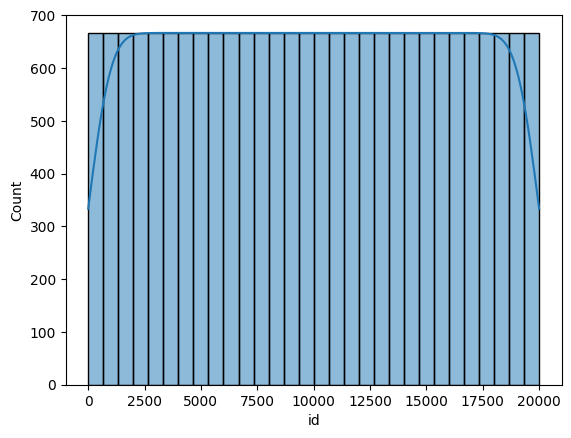

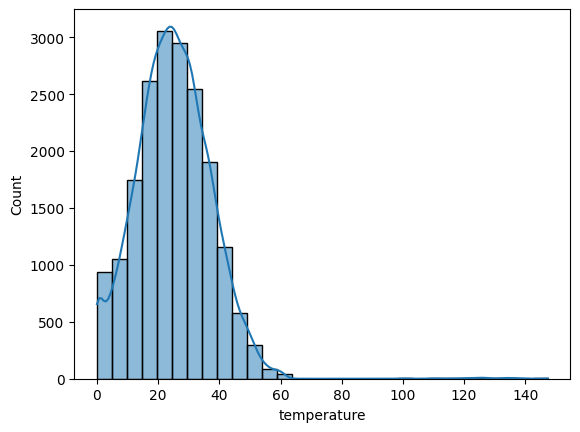

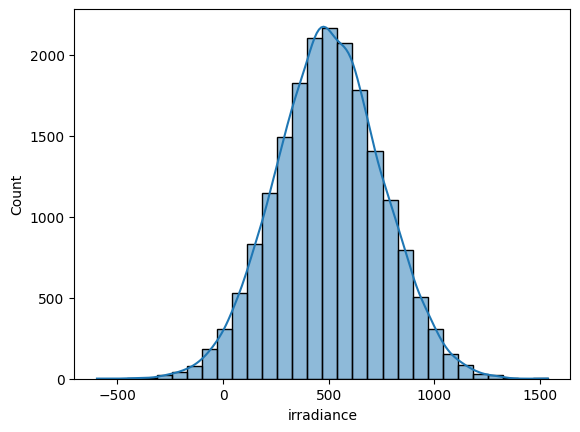

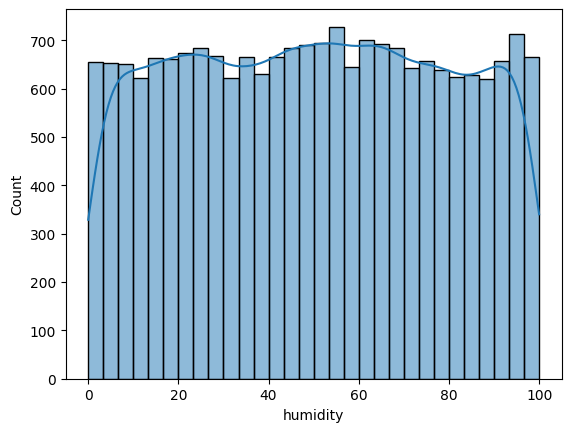

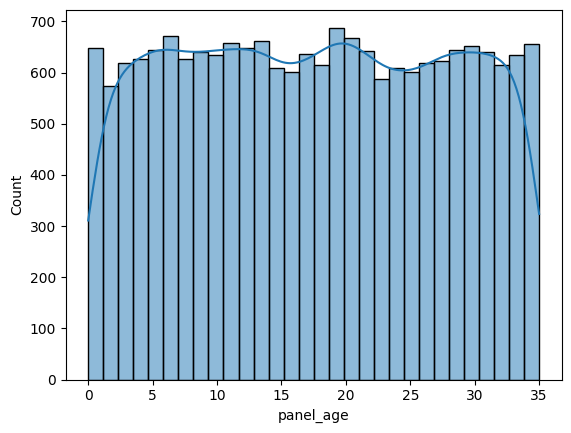

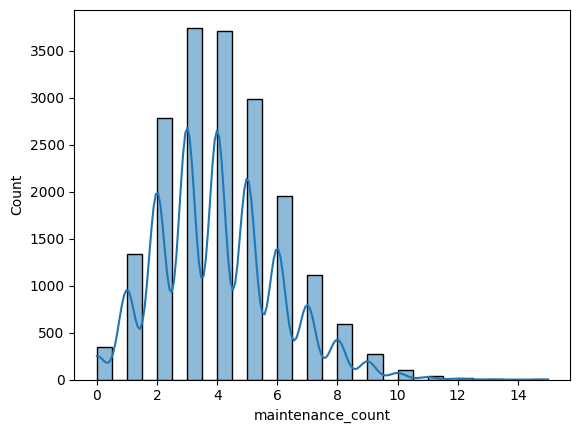

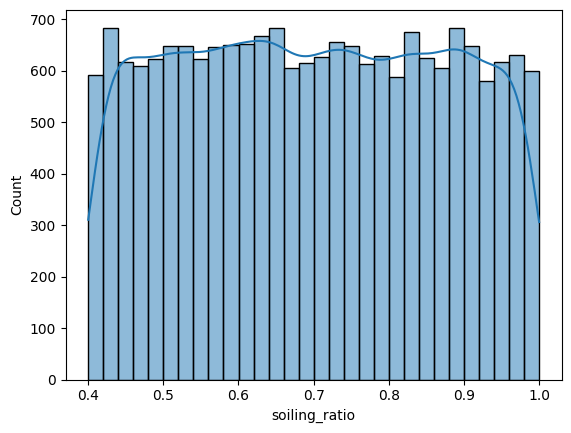

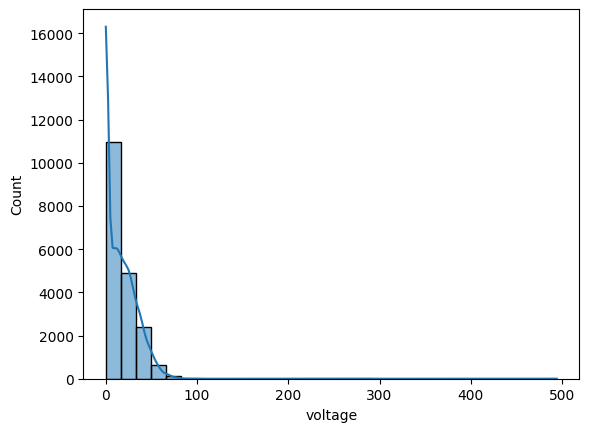

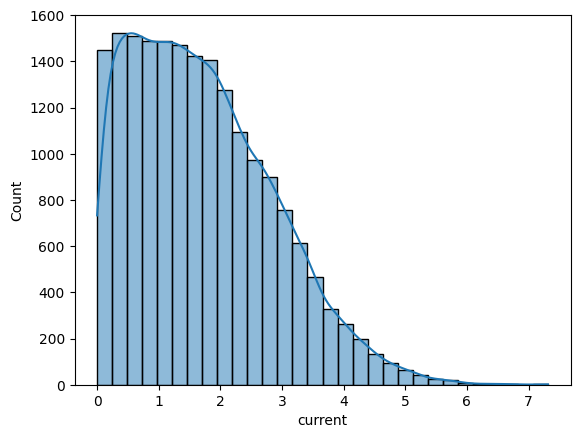

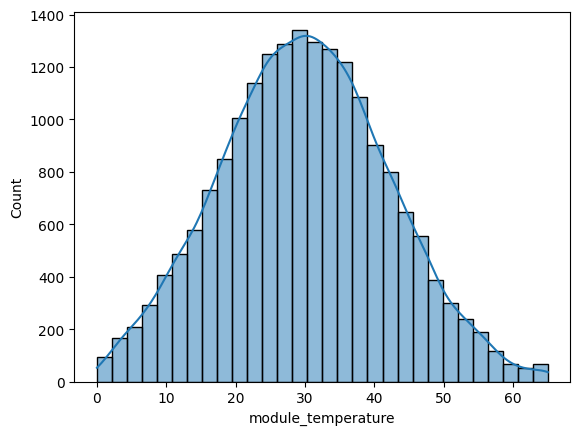

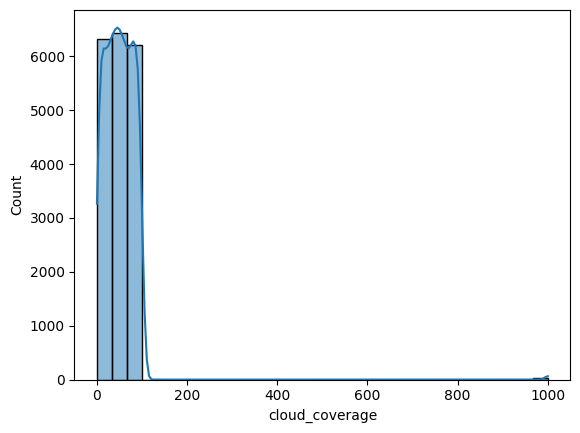

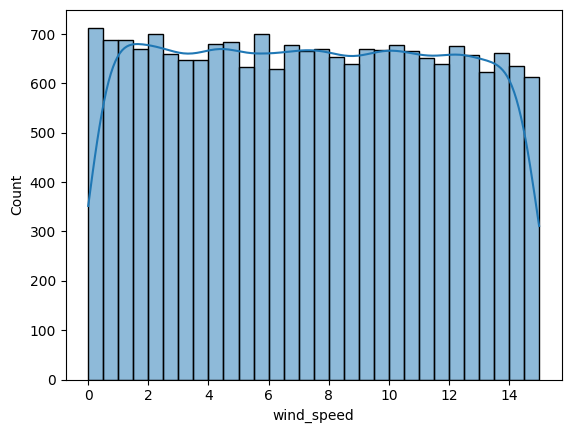

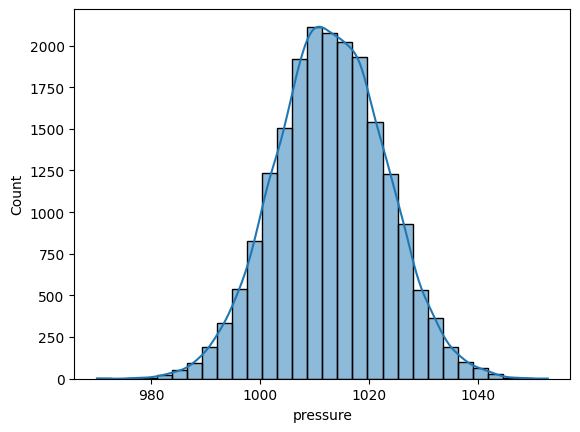

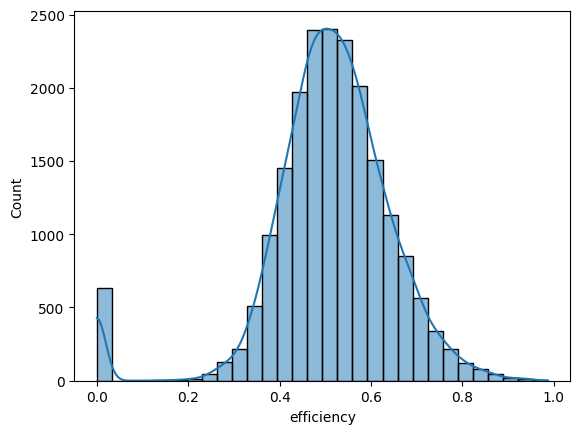

In [29]:
for clm in num_cols:
    sns.histplot(df[clm], bins=30, kde=True)
    plt.show()

In [30]:
df.isnull().sum()

id                       0
temperature           1001
irradiance             987
humidity               127
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed             119
pressure               135
string_id                0
error_code            5912
installation_type     5028
efficiency               0
dtype: int64

In [31]:
df.describe()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,efficiency
count,20000.000000,18999.000000,19013.000000,19873.000000,18989.000000,18973.000000,18990.000000,19007.000000,19023.000000,19022.000000,18990.000000,19881.000000,19865.000000,20000.000000
mean,9999.500000,25.077241,501.273896,50.066170,17.509758,4.012070,0.698879,16.242251,1.713396,29.923807,51.378575,7.413225,1012.981286,0.510260
std,5773.647028,12.513129,250.926590,28.709656,10.097557,2.002268,0.172244,17.889031,1.152953,12.125405,48.473664,4.329861,10.046245,0.140420
min,0.000000,0.000000,-597.278646,0.010714,0.001264,0.000000,0.400149,0.000000,0.000054,0.000000,0.000244,0.001277,970.087365,0.000000
25%,4999.750000,16.853522,332.227277,25.273574,8.777905,3.000000,0.550654,0.000000,0.772311,21.522124,25.081618,3.668529,1006.187799,0.445613
50%,9999.500000,24.720345,499.654730,50.224152,17.497731,4.000000,0.697663,12.350138,1.558413,29.857669,49.704133,7.396091,1012.906121,0.515709
75%,14999.250000,32.848917,668.416734,74.513994,26.340761,5.000000,0.847838,26.557322,2.474744,38.094943,75.052824,11.158582,1019.786203,0.590324
max,19999.000000,147.394168,1537.810349,99.995202,34.998379,15.000000,0.999949,494.279016,7.315597,65.000000,1000.000000,14.999448,1052.865715,0.987066


In [32]:
cnt = 0
for i in df['irradiance']:
    if i<0:
        cnt += 1
print(cnt)

424


In [33]:
df.tail()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
19995,19995,16.868428,NaN,93.530318,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,12.594122,1018.374467,B2,E02,tracking,0.664907
19996,19996,53.415061,296.970303,93.985714,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,0.976991,1016.081102,D4,E00,fixed,0.354070
19997,19997,2.442727,660.328019,37.968918,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,4.750937,1009.684461,D4,NaN,tracking,0.419734
19998,19998,NaN,632.760700,43.014702,19.063517,4.0,NaN,0.000000,1.068906,21.149351,78.123689,11.304158,1006.673875,A1,E00,tracking,0.661963
19999,19999,25.311591,793.745224,28.918781,20.073134,1.0,0.971922,41.247616,4.017684,32.623079,95.807146,7.276422,1017.394804,C3,NaN,fixed,0.714566


In [34]:
norm_col = ['pressure']

In [35]:
for clm in norm_col:
    df[clm] = df[clm].fillna(df[clm].mean())

In [36]:
df.tail()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
19995,19995,16.868428,NaN,93.530318,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,12.594122,1018.374467,B2,E02,tracking,0.664907
19996,19996,53.415061,296.970303,93.985714,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,0.976991,1016.081102,D4,E00,fixed,0.354070
19997,19997,2.442727,660.328019,37.968918,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,4.750937,1009.684461,D4,NaN,tracking,0.419734
19998,19998,NaN,632.760700,43.014702,19.063517,4.0,NaN,0.000000,1.068906,21.149351,78.123689,11.304158,1006.673875,A1,E00,tracking,0.661963
19999,19999,25.311591,793.745224,28.918781,20.073134,1.0,0.971922,41.247616,4.017684,32.623079,95.807146,7.276422,1017.394804,C3,NaN,fixed,0.714566


In [37]:
df.isna().sum()

id                       0
temperature           1001
irradiance             987
humidity               127
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed             119
pressure                 0
string_id                0
error_code            5912
installation_type     5028
efficiency               0
dtype: int64

In [38]:
df.dtypes

id                      int64
temperature           float64
irradiance            float64
humidity              float64
panel_age             float64
maintenance_count     float64
soiling_ratio         float64
voltage               float64
current               float64
module_temperature    float64
cloud_coverage        float64
wind_speed            float64
pressure              float64
string_id              object
error_code             object
installation_type      object
efficiency            float64
dtype: object

In [39]:
df.isna().sum()

id                       0
temperature           1001
irradiance             987
humidity               127
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed             119
pressure                 0
string_id                0
error_code            5912
installation_type     5028
efficiency               0
dtype: int64

In [40]:
for clm in norm_col:
    df[clm] = pd.to_numeric(df[clm], errors='coerce')

In [41]:
df.isna().sum()

id                       0
temperature           1001
irradiance             987
humidity               127
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed             119
pressure                 0
string_id                0
error_code            5912
installation_type     5028
efficiency               0
dtype: int64

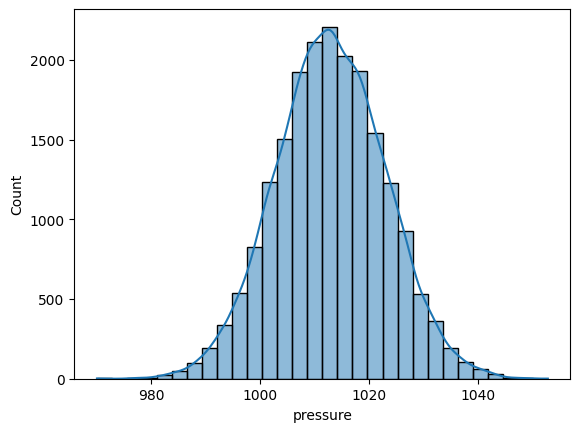

In [42]:
for clm in norm_col:
    sns.histplot(df[clm], bins=30, kde=True)
    plt.show()

In [43]:
df['error_code'] = df['error_code'].fillna('NA')

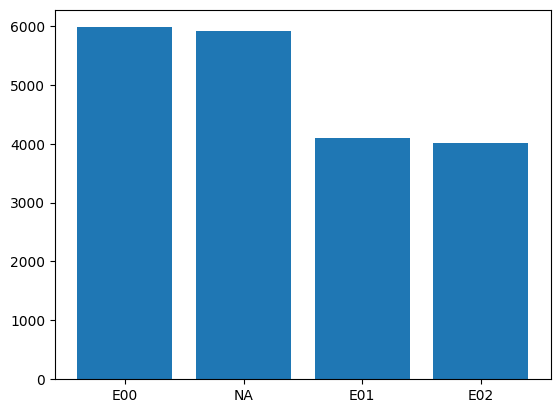

In [44]:
categories = df['error_code'].value_counts()
plt.bar(categories.index, categories.values)
plt.show()

In [45]:
df_hm = df[num_cols]
df_hm.corr(method='pearson')

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,efficiency
id,1.000000,-0.002298,0.019788,0.003445,-0.012660,0.010541,-0.000741,0.008299,0.008568,-0.001103,0.004396,-0.000550,-0.011627,0.009166
temperature,-0.002298,1.000000,0.008274,0.002806,-0.009309,-0.002348,0.006976,-0.009350,0.007049,0.909819,0.003824,-0.005331,-0.003312,-0.043876
irradiance,0.019788,0.008274,1.000000,0.002707,0.006782,-0.011034,0.004839,0.258893,0.461028,0.006734,-0.002959,-0.004728,-0.005491,0.580167
humidity,0.003445,0.002806,0.002707,1.000000,-0.008319,-0.003183,0.001391,-0.001555,-0.003524,0.000896,0.001570,0.001317,0.011432,-0.065666
panel_age,-0.012660,-0.009309,0.006782,-0.008319,1.000000,-0.003961,0.000382,0.011674,0.006224,-0.006577,0.000421,0.012216,0.002052,-0.187855
maintenance_count,0.010541,-0.002348,-0.011034,-0.003183,-0.003961,1.000000,0.023783,0.003456,-0.011932,0.004320,-0.007967,-0.008492,0.005384,0.016274
soiling_ratio,-0.000741,0.006976,0.004839,0.001391,0.000382,0.023783,1.000000,-0.001261,-0.003911,0.005084,0.010666,-0.003062,-0.006458,0.293931
voltage,0.008299,-0.009350,0.258893,-0.001555,0.011674,0.003456,-0.001261,1.000000,0.106108,-0.006930,0.000303,-0.001278,-0.002201,0.155419
current,0.008568,0.007049,0.461028,-0.003524,0.006224,-0.011932,-0.003911,0.106108,1.000000,0.005996,0.000175,0.000340,-0.002568,0.270045
module_temperature,-0.001103,0.909819,0.006734,0.000896,-0.006577,0.004320,0.005084,-0.006930,0.005996,1.000000,0.000621,-0.007622,-0.005589,-0.049686


In [46]:
# Temperature and module_temperature are highly correlated
# Irradiance and current has good correlation


In [47]:
df['wind_speed'] = df['wind_speed'].fillna(df['wind_speed'].mean())

In [48]:
df['pressure'] = df['pressure'].fillna(df['pressure'].median())

In [49]:
df.isnull().sum()

id                       0
temperature           1001
irradiance             987
humidity               127
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed               0
pressure                 0
string_id                0
error_code               0
installation_type     5028
efficiency               0
dtype: int64

In [50]:
df['humidity'] = df['humidity'].fillna(df['humidity'].median())

In [51]:
df.isnull().sum()

id                       0
temperature           1001
irradiance             987
humidity                 0
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed               0
pressure                 0
string_id                0
error_code               0
installation_type     5028
efficiency               0
dtype: int64

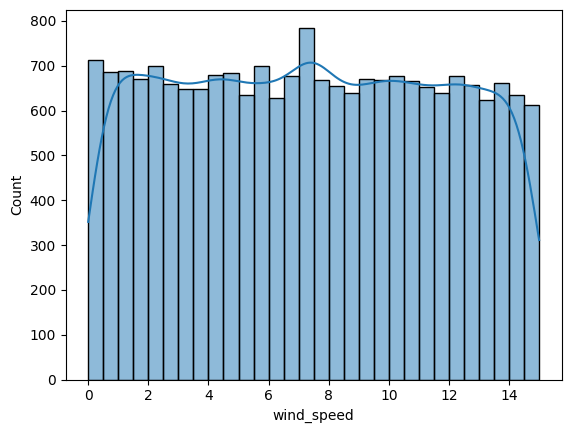

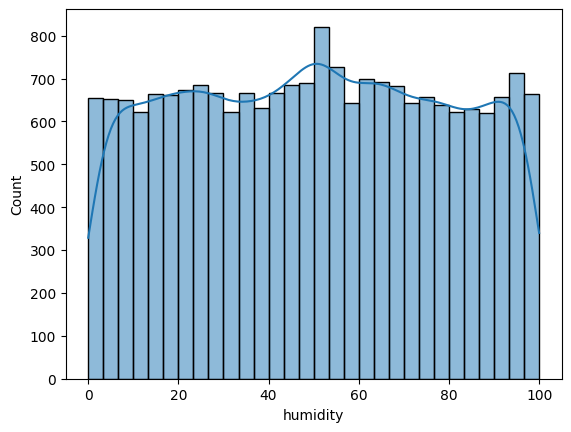

In [52]:
sns.histplot(df['wind_speed'], bins=30, kde=True)
plt.show()
sns.histplot(df['humidity'], bins=30, kde=True)
plt.show()

In [53]:
dftemp = df[['module_temperature','temperature']]

In [54]:
import math

In [55]:
print(math.isnan(dftemp['temperature'][19998]))
dftemp.tail()

True


,module_temperature,temperature
19995,26.206810,16.868428
19996,65.000000,53.415061
19997,11.584869,2.442727
19998,21.149351,NaN
19999,32.623079,25.311591


In [56]:
both_nan_idx = []
for i,mt in dftemp.iterrows():
    if (math.isnan(mt['module_temperature']) and math.isnan(mt['temperature']) ):
        both_nan_idx.append(i)
        print(i, mt)
print(both_nan_idx)

603 module_temperature   NaN
temperature          NaN
Name: 603, dtype: float64
757 module_temperature   NaN
temperature          NaN
Name: 757, dtype: float64
1003 module_temperature   NaN
temperature          NaN
Name: 1003, dtype: float64
1250 module_temperature   NaN
temperature          NaN
Name: 1250, dtype: float64
3359 module_temperature   NaN
temperature          NaN
Name: 3359, dtype: float64
3607 module_temperature   NaN
temperature          NaN
Name: 3607, dtype: float64
4037 module_temperature   NaN
temperature          NaN
Name: 4037, dtype: float64
4465 module_temperature   NaN
temperature          NaN
Name: 4465, dtype: float64
4964 module_temperature   NaN
temperature          NaN
Name: 4964, dtype: float64
5562 module_temperature   NaN
temperature          NaN
Name: 5562, dtype: float64
6156 module_temperature   NaN
temperature          NaN
Name: 6156, dtype: float64
7523 module_temperature   NaN
temperature          NaN
Name: 7523, dtype: float64
8032 module_temperat

In [57]:
mod_temp_mean = df['module_temperature'].mean()
#mask = dftemp.index.isin(both_nan_idx)
#dftemp['module_temperature'] = dftemp['module_temperature'].fillna(value=mod_temp_mean, mask=mask)
#for i in both_nan_idx:
dftemp.loc[both_nan_idx, 'module_temperature'] = mod_temp_mean
print(dftemp.isna().sum())

module_temperature     946
temperature           1001
dtype: int64


C:\Users\saura\AppData\Local\Temp\ipykernel_40004\323745320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp.loc[both_nan_idx, 'module_temperature'] = mod_temp_mean


In [58]:
dftemp.tail()

,module_temperature,temperature
19995,26.206810,16.868428
19996,65.000000,53.415061
19997,11.584869,2.442727
19998,21.149351,NaN
19999,32.623079,25.311591


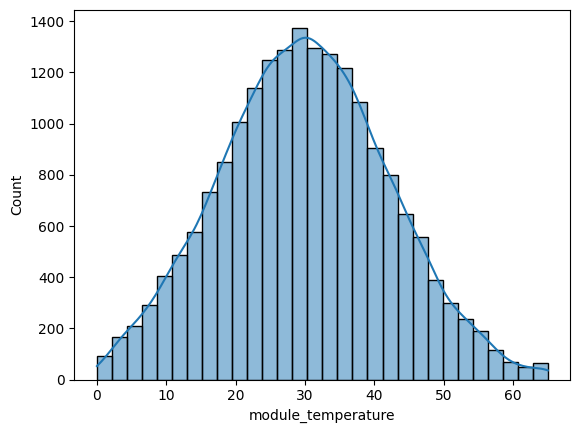

In [59]:
sns.histplot(dftemp['module_temperature'], bins=30, kde=True)
plt.show()

In [60]:
dftemp2 = dftemp.copy()
dftemp2.head()

,module_temperature,temperature
0,13.691147,7.817315
1,27.545096,24.785727
2,43.363708,46.652695
3,57.720436,53.339567
4,6.786263,5.575374


In [61]:
dftemp2 = dftemp2.dropna()
dftemp2.isna().sum()

module_temperature    0
temperature           0
dtype: int64

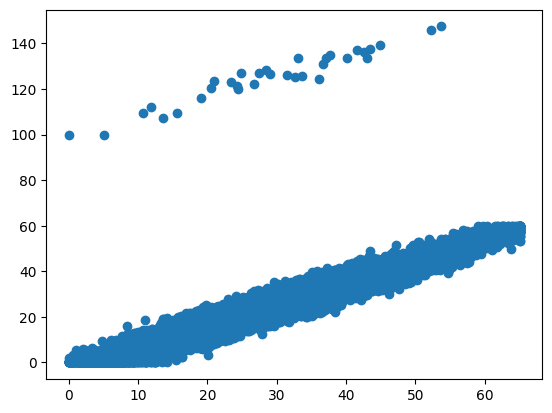

In [62]:
plt.scatter(dftemp2['module_temperature'], dftemp2['temperature'])
plt.show()

In [63]:
otl = 0
otl_index = []
for i,mt in dftemp2.iterrows():
    if (mt['temperature']) >80:
        otl += 1
        otl_index.append(i)
        print(i, mt)
print(otl_index)

621 module_temperature     43.480398
temperature           137.411433
Name: 621, dtype: float64
782 module_temperature     42.544161
temperature           136.051106
Name: 782, dtype: float64
1686 module_temperature     29.095638
temperature           126.745876
Name: 1686, dtype: float64
2156 module_temperature     13.658967
temperature           107.149504
Name: 2156, dtype: float64
3343 module_temperature     11.885883
temperature           111.990702
Name: 3343, dtype: float64
3373 module_temperature      5.105648
temperature           100.000000
Name: 3373, dtype: float64
5225 module_temperature     32.563430
temperature           125.316242
Name: 5225, dtype: float64
5241 module_temperature     20.542799
temperature           120.578878
Name: 5241, dtype: float64
5570 module_temperature     40.157741
temperature           133.636959
Name: 5570, dtype: float64
6821 module_temperature     27.451563
temperature           126.851992
Name: 6821, dtype: float64
7530 module_temperature 

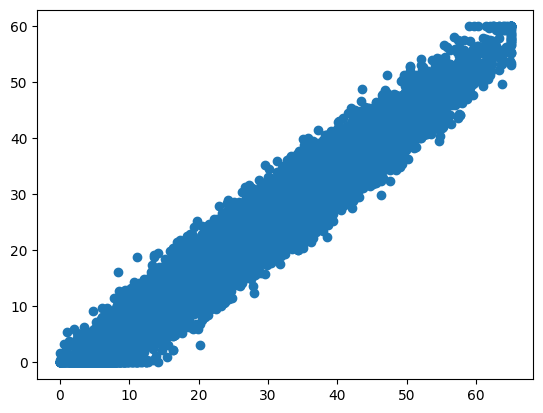

In [64]:
dftemp2 = dftemp2.drop(index=otl_index)
plt.scatter(dftemp2['module_temperature'], dftemp2['temperature'])
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
dftemp2.head()

,module_temperature,temperature
0,13.691147,7.817315
1,27.545096,24.785727
2,43.363708,46.652695
3,57.720436,53.339567
4,6.786263,5.575374


In [67]:
X_temp = dftemp2.drop('temperature', axis=1)
y_temp = dftemp2.drop('module_temperature', axis=1)
X_temp.shape
X_temp_train,X_temp_test, y_temp_train,  y_temp_test = train_test_split(X_temp, y_temp, test_size=0.2)
y_temp_test.shape


(3604, 1)

In [68]:
fimodel = LinearRegression()
fimodel.fit(X_temp_train, y_temp_train)

LinearRegression()

In [69]:
fimodel.predict(X_temp_test)

array([[28.45292749],
       [19.67305194],
       [36.45180822],
       ...,
       [25.02823225],
       [ 7.7242697 ],
       [25.89924507]])

In [70]:
fimodel.score(X_temp_test, y_temp_test)

0.9383038454279221

In [71]:
def predict(mtemp):
    x = fimodel.predict([[mtemp]])
    return x[0][0]

In [72]:
for i, mt in dftemp.iterrows():
    if math.isnan(mt['temperature']):
        t = predict(mt['module_temperature'])
        dftemp.loc[i, 'temperature'] = t

d:\AI-ML\Zelestra Hackathon\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\saura\AppData\Local\Temp\ipykernel_40004\4121970669.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftemp.loc[i, 'temperature'] = t
d:\AI-ML\Zelestra Hackathon\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\saura\AppData\Local\Temp\ipykernel_40004\4121970669.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [73]:
dftemp.isnull().sum()

module_temperature    946
temperature             0
dtype: int64

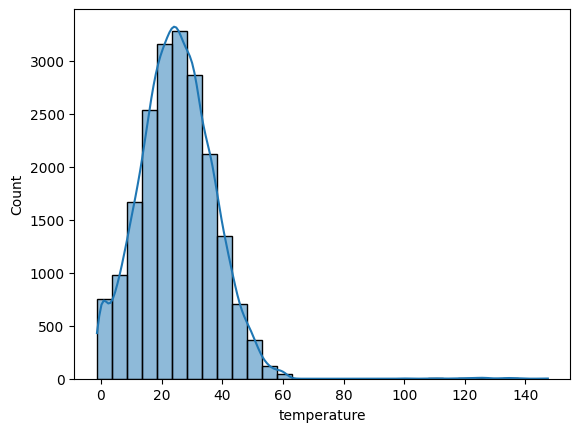

In [74]:
sns.histplot(dftemp['temperature'], bins=30, kde=True)
plt.show()

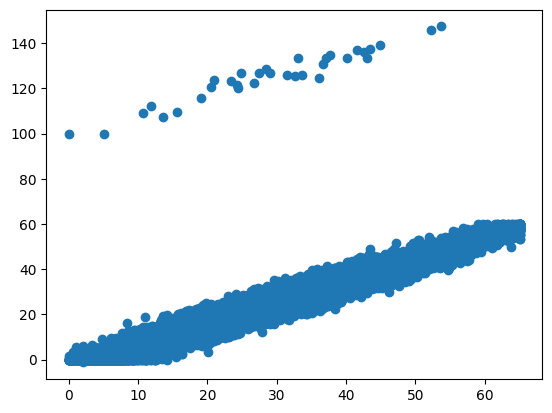

In [75]:
plt.scatter(dftemp['module_temperature'], dftemp['temperature'])
plt.show()

In [76]:
df['temperature'] = dftemp['temperature']
df.isna().sum()

id                       0
temperature              0
irradiance             987
humidity                 0
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
wind_speed               0
pressure                 0
string_id                0
error_code               0
installation_type     5028
efficiency               0
dtype: int64

In [77]:
df.drop('module_temperature', axis=1, inplace=True)
df.isna().sum()

id                      0
temperature             0
irradiance            987
humidity                0
panel_age            1011
maintenance_count    1027
soiling_ratio        1010
voltage               993
current               977
cloud_coverage       1010
wind_speed              0
pressure                0
string_id               0
error_code              0
installation_type    5028
efficiency              0
dtype: int64

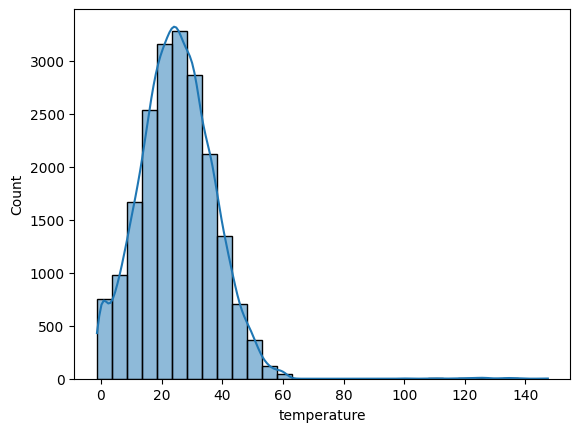

In [78]:
sns.histplot(df['temperature'], bins=30, kde=True)
plt.show()

In [81]:
df[['installation_type', 'error_code']] = df[['installation_type', 'error_code']].fillna('NA')

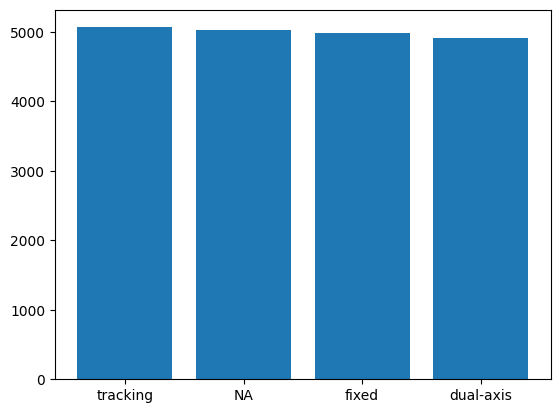

In [82]:
categories = df['installation_type'].value_counts()
plt.bar(categories.index, categories.values)
plt.show()

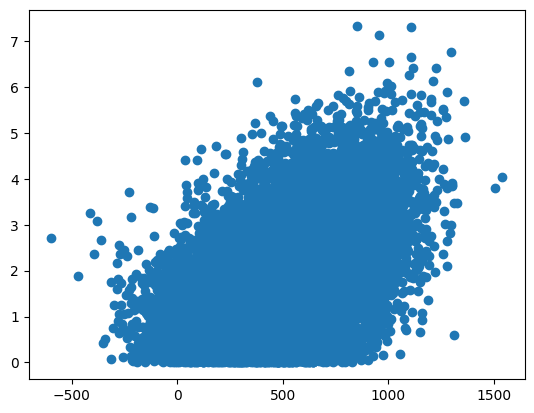

In [83]:
plt.scatter(df['irradiance'], df['current'])
plt.show()

In [84]:
df.drop('id', axis=1, inplace=True)

In [85]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer


In [86]:
#new_df = df.drop(['installation_type', 'error_code', 'string_id'], axis=1)

In [87]:
#new_df.head()

In [88]:
#imputer = IterativeImputer(random_state=4)
#df_imputed = imputer.fit_transform(new_df)

In [89]:
#df2_imputed = pd.DataFrame(df_imputed)
#df2_imputed.head()

In [90]:
df = pd.get_dummies(df, columns=['installation_type', 'error_code', 'string_id'], drop_first=True)

In [91]:
df.head()

,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,cloud_coverage,wind_speed,...,efficiency,installation_type_dual-axis,installation_type_fixed,installation_type_tracking,error_code_E01,error_code_E02,error_code_NA,string_id_B2,string_id_C3,string_id_D4
0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,62.494044,12.824912,...,0.562096,False,False,False,False,False,True,False,False,False
1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,43.851238,12.012044,...,0.396447,True,False,False,False,False,False,False,False,True
2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,NaN,1.814400,...,0.573776,False,False,False,False,False,False,False,True,False
3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,67.361473,8.736259,...,0.629009,True,False,False,False,False,True,False,False,False
4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,0.000000,0.898062,3.632000,0.522684,...,0.341874,False,True,False,False,False,False,True,False,False


In [92]:
df2 = df.drop(['pressure', 'wind_speed'], axis=1)
imputer = IterativeImputer(random_state=4)
dt_imputed = imputer.fit_transform(df2)
df_imputed = pd.DataFrame(dt_imputed)
df_imputed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,62.494044,0.562096,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,43.851238,0.396447,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,51.304350,0.573776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,67.361473,0.629009,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,0.000000,0.898062,3.632000,0.341874,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [93]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type
0,0,17.618379,85.449838,90.81542277591531,13.910963,6.0,0.889765,6.370396,0.069101,19.517274,33.509889,7.1819582155525445,1034.782455188643,C3,E01,tracking
1,1,34.826323,722.801748,20.98299301574633,20.916528,4.0,0.590372,30.095867,1.713852,37.421443,32.327060,4.184581989921003,992.3197520437311,D4,E00,NaN
2,2,33.776934,485.491998,55.61404977577451,1.446962,3.0,0.611425,28.424430,1.696936,32.147763,69.613333,6.25944104775485,999.2134568588949,D4,E01,dual-axis
3,3,18.584189,350.022720,49.04476645510075,18.810133,5.0,NaN,7.848038,0.787188,25.734118,42.862760,2.7696074663593944,1026.6500782154521,C3,E02,dual-axis
4,4,43.044908,437.295622,8.761571340027164,NaN,8.0,0.564938,12.300717,1.867620,NaN,51.025763,11.846974043208318,1010.809942771749,B2,NaN,fixed


In [94]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  12000 non-null  int64  
 1   temperature         11418 non-null  float64
 2   irradiance          11385 non-null  float64
 3   humidity            12000 non-null  object 
 4   panel_age           11393 non-null  float64
 5   maintenance_count   11391 non-null  float64
 6   soiling_ratio       11390 non-null  float64
 7   voltage             11453 non-null  float64
 8   current             11413 non-null  float64
 9   module_temperature  11420 non-null  float64
 10  cloud_coverage      11418 non-null  float64
 11  wind_speed          12000 non-null  object 
 12  pressure            12000 non-null  object 
 13  string_id           12000 non-null  object 
 14  error_code          8389 non-null   object 
 15  installation_type   9021 non-null   object 
dtypes: f

In [95]:
df_test.isna().sum()

id                       0
temperature            582
irradiance             615
humidity                 0
panel_age              607
maintenance_count      609
soiling_ratio          610
voltage                547
current                587
module_temperature     580
cloud_coverage         582
wind_speed               0
pressure                 0
string_id                0
error_code            3611
installation_type     2979
dtype: int64

In [96]:
df_test['error_code'] = df_test['error_code'].fillna('NA')
df_test['installation_type'] = df_test['installation_type'].fillna('NA')

In [97]:
df_test.drop(['id','pressure','wind_speed'], axis=1, inplace=True)

In [98]:
df_test['humidity'] = pd.to_numeric(df_test['humidity'], errors='coerce')

In [99]:
df_test['humidity'] = df_test['humidity'].fillna(df_test['humidity'].mean())

In [100]:
df_test_temp = df_test[['temperature', 'module_temperature']]
df_test_temp.head()

,temperature,module_temperature
0,17.618379,19.517274
1,34.826323,37.421443
2,33.776934,32.147763
3,18.584189,25.734118
4,43.044908,NaN


In [101]:
both_tnan_idx = []
for i,mt in df_test_temp.iterrows():
    if (math.isnan(mt['module_temperature']) and math.isnan(mt['temperature']) ):
        both_tnan_idx.append(i)
        print(i, mt)
print(both_tnan_idx)

170 temperature          NaN
module_temperature   NaN
Name: 170, dtype: float64
447 temperature          NaN
module_temperature   NaN
Name: 447, dtype: float64
1391 temperature          NaN
module_temperature   NaN
Name: 1391, dtype: float64
1855 temperature          NaN
module_temperature   NaN
Name: 1855, dtype: float64
2471 temperature          NaN
module_temperature   NaN
Name: 2471, dtype: float64
2486 temperature          NaN
module_temperature   NaN
Name: 2486, dtype: float64
3609 temperature          NaN
module_temperature   NaN
Name: 3609, dtype: float64
4085 temperature          NaN
module_temperature   NaN
Name: 4085, dtype: float64
4512 temperature          NaN
module_temperature   NaN
Name: 4512, dtype: float64
4660 temperature          NaN
module_temperature   NaN
Name: 4660, dtype: float64
4880 temperature          NaN
module_temperature   NaN
Name: 4880, dtype: float64
6032 temperature          NaN
module_temperature   NaN
Name: 6032, dtype: float64
6115 temperature    

In [102]:
mod_tempt_mean = df_test_temp['module_temperature'].mean()
df_test_temp.loc[both_tnan_idx, 'module_temperature'] = mod_tempt_mean
print(df_test_temp.isna().sum())

temperature           582
module_temperature    552
dtype: int64


C:\Users\saura\AppData\Local\Temp\ipykernel_40004\2033586856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_temp.loc[both_tnan_idx, 'module_temperature'] = mod_tempt_mean


In [103]:
for i, mt in df_test_temp.iterrows():
    if math.isnan(mt['temperature']):
        t = predict(mt['module_temperature'])
        df_test_temp.loc[i, 'temperature'] = t

d:\AI-ML\Zelestra Hackathon\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\saura\AppData\Local\Temp\ipykernel_40004\296641666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_temp.loc[i, 'temperature'] = t
d:\AI-ML\Zelestra Hackathon\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\saura\AppData\Local\Temp\ipykernel_40004\296641666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [104]:
df_test['temperature'] = df_test_temp['temperature']

In [105]:
df_test.drop('module_temperature', axis=1, inplace=True)

In [106]:
df_test = pd.get_dummies(df_test, columns=['installation_type', 'error_code', 'string_id'], drop_first=True)

In [107]:
imputer2 = IterativeImputer(random_state=4)
dt_imputed2 = imputer2.fit_transform(df_test)
df_imputed2 = pd.DataFrame(dt_imputed2)
df_imputed2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,17.618379,85.449838,90.815423,13.910963,6.0,0.889765,6.370396,0.069101,33.509889,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,34.826323,722.801748,20.982993,20.916528,4.0,0.590372,30.095867,1.713852,32.327060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33.776934,485.491998,55.614050,1.446962,3.0,0.611425,28.424430,1.696936,69.613333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,18.584189,350.022720,49.044766,18.810133,5.0,0.702633,7.848038,0.787188,42.862760,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,43.044908,437.295622,8.761571,17.459286,8.0,0.564938,12.300717,1.867620,51.025763,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [108]:
df_imputed2.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [109]:
df_test.isna().sum()

temperature                      0
irradiance                     615
humidity                         0
panel_age                      607
maintenance_count              609
soiling_ratio                  610
voltage                        547
current                        587
cloud_coverage                 582
installation_type_dual-axis      0
installation_type_fixed          0
installation_type_tracking       0
error_code_E01                   0
error_code_E02                   0
error_code_NA                    0
string_id_B2                     0
string_id_C3                     0
string_id_D4                     0
dtype: int64

In [110]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scale = MinMaxScaler()

In [112]:
scaled_df = scale.fit_transform(df_imputed)

In [113]:
scaled_df = pd.DataFrame(scaled_df)

In [114]:
df_imputed #Input features X
target_feat = scaled_df[scaled_df.columns[9]] # Target feature y
df_train = scaled_df.drop(scaled_df.columns[9], axis=1)
print(target_feat)

0        0.569462
1        0.401642
2        0.581295
3        0.637252
4        0.346354
           ...   
19995    0.673619
19996    0.358710
19997    0.425234
19998    0.670638
19999    0.723930
Name: 9, Length: 20000, dtype: float64


In [115]:
X_train,X_test, y_train,  y_test = train_test_split(df_train, target_feat, test_size=0.2)

In [116]:
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)

LinearRegression()

In [117]:
linmodel.score(X_test, y_test)

0.4808472213469963

In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
rfmodel = RandomForestRegressor( criterion='squared_error')
rfmodel.fit(X_train, y_train)

RandomForestRegressor()

In [120]:
rfmodel.score(X_test, y_test)

0.47306371906684064

In [121]:
import xgboost as xgb

In [122]:
xgmodel = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=70, max_depth=3, learning_rate=0.1, random_state=9)
xgmodel.fit(X_train, y_train, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=9, ...)

In [123]:
xgmodel.score(X_test, y_test)

0.5100383633248515

In [124]:
xgmodel.score(X_train, y_train)

0.5277920859042023

In [125]:
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
gbmodel = GradientBoostingRegressor()
gbmodel.fit(X_train, y_train)

GradientBoostingRegressor()

In [127]:
gbmodel.score(X_test, y_test)

0.5140949877711328

In [131]:
for i, m in df[['temperature']].iterrows():
    print(i, m)

0 temperature    7.817315
Name: 0, dtype: float64
1 temperature    24.785727
Name: 1, dtype: float64
2 temperature    46.652695
Name: 2, dtype: float64
3 temperature    53.339567
Name: 3, dtype: float64
4 temperature    5.575374
Name: 4, dtype: float64
5 temperature    16.545541
Name: 5, dtype: float64
6 temperature    18.728064
Name: 6, dtype: float64
7 temperature    52.060643
Name: 7, dtype: float64
8 temperature    24.18008
Name: 8, dtype: float64
9 temperature    37.895969
Name: 9, dtype: float64
10 temperature    28.596486
Name: 10, dtype: float64
11 temperature    8.306395
Name: 11, dtype: float64
12 temperature    2.682375
Name: 12, dtype: float64
13 temperature    17.642899
Name: 13, dtype: float64
14 temperature    52.802479
Name: 14, dtype: float64
15 temperature    28.091359
Name: 15, dtype: float64
16 temperature    37.652488
Name: 16, dtype: float64
17 temperature    7.981089
Name: 17, dtype: float64
18 temperature    21.097337
Name: 18, dtype: float64
19 temperature    3

In [128]:
pred_otpt = xgmodel.predict(df_imputed2)

ValueError: feature_names mismatch: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '14', '15', '16', '17', '18'] ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']
expected 18 in input data
training data did not have the following fields: 9